In [1]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
import qiskit.circuit.library as circuits

# For simulation
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())

Gate error ratio: {'x': 1.0, 'rz': 0.0, 'sx': 1.0}


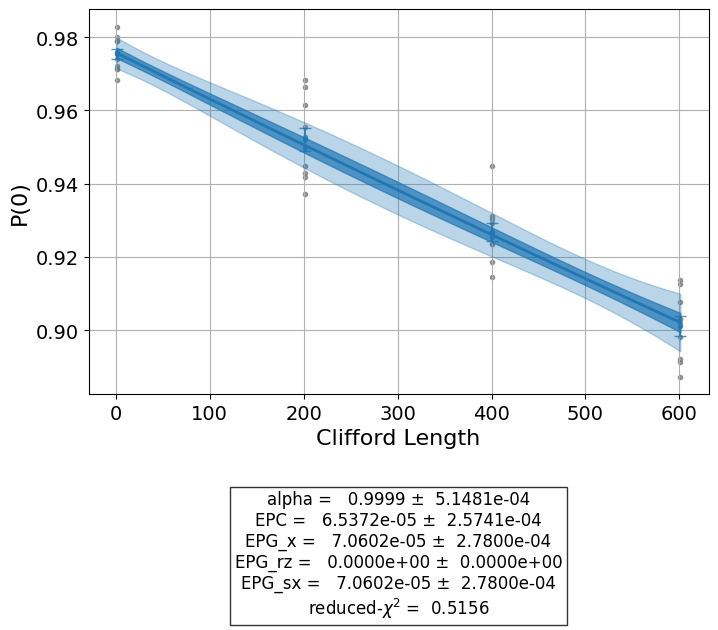

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 159
 - degree of freedom: 1
 - chi-square: 0.5156232926600441
 - reduced chi-square: 0.5156232926600441
 - Akaike info crit.: -2.1946927768933087
 - Bayesian info crit.: -4.035809693533637
 - init params:
  * a = 0.4755493883466937
  * alpha = 0.9997166346889421
  * b = 0.5
 - fit params:
  * a = 0.9758226752131489 ± 3.708640542504989
  * alpha = 0.9998692552676819 ± 0.0005148141249967958
  * b = 2.8556581698033692e-15 ± 3.7090254237448326
 - correlations:
  * (a, b) = -0.9999999321176706
  * (alpha, b) = -0.9999551612508992
  * (a, alpha) = 0.9999529624523451
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: alpha
- value: 0.9999+/-0.0005
- χ²: 0.5156232926600441
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult

In [2]:
lengths = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
print("Gate error ratio: %s" % expdata1.experiment.analysis.options.gate_error_ratio)
display(expdata1.figure(0))
for result in results1:
    print(result)

In [3]:
lengths_2_qubit = np.arange(1, 200, 30)
lengths_1_qubit = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = (1, 2)

# Run a 1-qubit RB experiment on qubits 1, 2 to determine the error-per-gate of 1-qubit gates
single_exps = BatchExperiment(
    [
        StandardRB([qubit], lengths_1_qubit, num_samples=num_samples, seed=seed)
        for qubit in qubits
    ],
    flatten_results=True,
)
expdata_1q = single_exps.run(backend).block_for_results()

Gate error ratio: {'cx': 1.0}


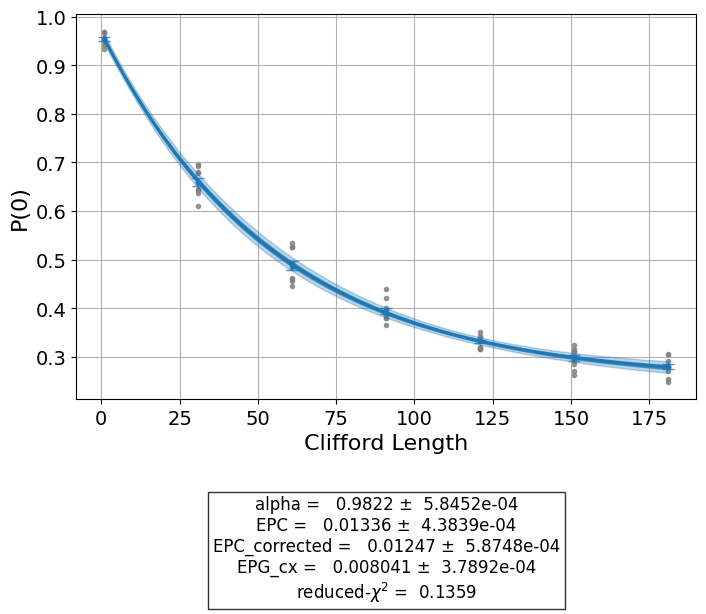

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 20
 - degree of freedom: 4
 - chi-square: 0.5435767292031217
 - reduced chi-square: 0.13589418230078043
 - Akaike info crit.: -11.888461887477241
 - Bayesian info crit.: -12.050731440311303
 - init params:
  * a = 0.7166260272729412
  * alpha = 0.9825854974078782
  * b = 0.25
 - fit params:
  * a = 0.7152800419894136 ± 0.007018291349233491
  * alpha = 0.9821875614546892 ± 0.0005845166913533707
  * b = 0.2515123915645176 ± 0.006704942561725279
 - correlations:
  * (alpha, b) = -0.9040829875967811
  * (a, b) = -0.8529695332467808
  * (a, alpha) = 0.7021792529930977
- quality: good
- device_components: ['Q1', 'Q2']
- verified: False
AnalysisResult
- name: alpha
- value: 0.9822+/-0.0006
- χ²: 0.13589418230078043
- quality: good
- device_components: ['Q1', 'Q2']
- verified: Fals

In [4]:
# Run an RB experiment on qubits 1, 2
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)

# Use the EPG data of the 1-qubit runs to ensure correct 2-qubit EPG computation
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())

# Run the 2-qubit experiment
expdata_2q = exp_2q.run(backend).block_for_results()

# View result data
print("Gate error ratio: %s" % expdata_2q.experiment.analysis.options.gate_error_ratio)
display(expdata_2q.figure(0))
for result in expdata_2q.analysis_results():
    print(result)

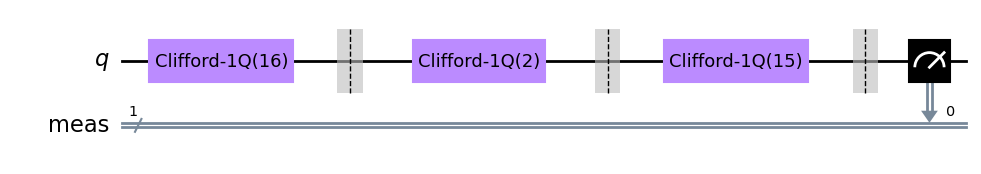

In [5]:
# Run an RB experiment on qubit 0
exp = StandardRB(physical_qubits=(0,), lengths=[2], num_samples=1, seed=seed)
c = exp.circuits()[0]
c.draw("mpl")

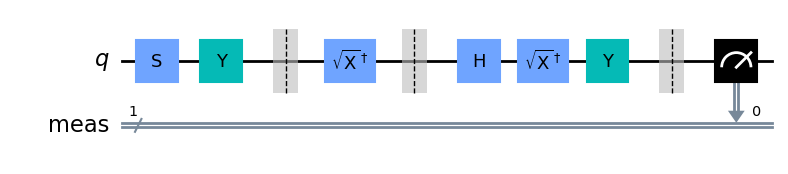

In [6]:
c.decompose().draw("mpl")

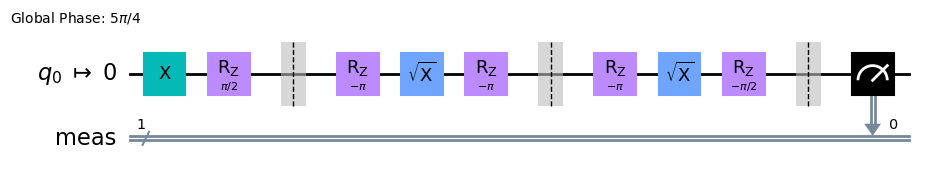

In [7]:
from qiskit import transpile
transpile(c, backend, **vars(exp.transpile_options)).draw("mpl", idle_wires=False)

In [8]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = (1, 2)

# The interleaved gate is the CX gate
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()

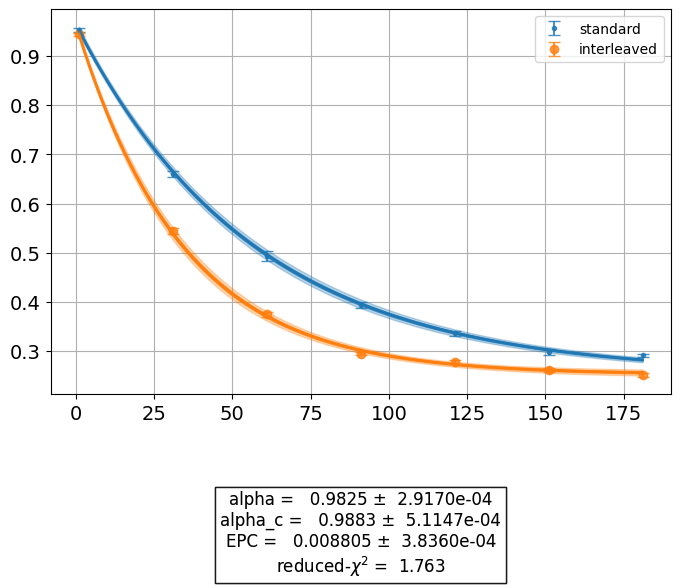

AnalysisResult
- name: @Parameters_InterleavedRBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 2
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
 - success: True
 - number of function evals: 30
 - degree of freedom: 10
 - chi-square: 17.631285811886965
 - reduced chi-square: 1.7631285811886965
 - Akaike info crit.: 11.228646362349659
 - Bayesian info crit.: 13.784875680810693
 - init params:
  * a = 0.716436255624211
  * alpha = 0.9844003288663684
  * b = 0.25
  * alpha_c = 0.9808516685214396
 - fit params:
  * a = 0.711572785713229 ± 0.0031543818886317345
  * alpha = 0.9825320500345789 ± 0.0002917034368829155
  * b = 0.25301567372009054 ± 0.0022699532974525824
  * alpha_c = 0.9882602239166562 ± 0.000511470037738889
 - correlations:
  * (alpha, b) = -0.6329259322990025
  * (a, b) = -0.5971764901825865
  * (b, alpha_c) = -0.35981424642646465
  * (alpha, alpha_c) = -0.07760892666060207
  * (a, alpha

In [9]:
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)